# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [43]:
data = pd.read_csv('reference/S4_L41/real_estate_price_size.csv')

In [44]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [45]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [46]:
x = data['size']
y = data['price']

### Explore the data

In [47]:
x.shape

(100,)

In [48]:
y.shape

(100,)

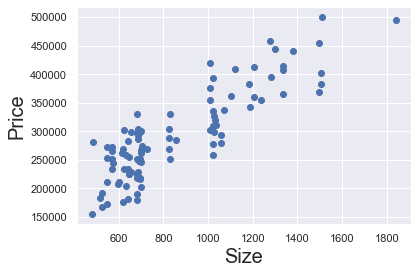

In [49]:
plt.scatter(x,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### Transform the inputs into a matrix (2D object)

In [50]:
x_matrix = x.values.reshape(-1, 1)

In [51]:
x_matrix.shape

(100, 1)

### Regression itself

In [52]:
import os
os.cpu_count()

4

In [53]:
!powershell -Command "Get-WmiObject -Class Win32_Processor | Select-Object -Property Name, Number*|fl"



Name                      : Intel(R) Pentium(R) CPU 4415Y @ 1.60GHz
NumberOfCores             : 2
NumberOfEnabledCore       : 2
NumberOfLogicalProcessors : 4





In [54]:
reg = LinearRegression(n_jobs=4)

In [55]:
reg.fit(x_matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

### Calculate the R-squared

In [79]:
SST = sum([(y_instance - y.mean())**2 for y_instance in y])
SSR = sum([(yhat - y.mean())**2 for yhat in reg.predict(x_matrix)])
newline = "\n"
print(f"SSR = {SSR}{newline}SST = {SST}{newline}R^2 = SSR/SST = {SSR/SST}")

SSR = 437727831873.76337
SST = 587759902740.053
R^2 = SSR/SST = 0.7447391865847577


In [80]:
reg.score(x_matrix, y)

0.7447391865847587

### Find the intercept

In [36]:
reg.intercept_

101912.60180122915

### Find the coefficients

In [35]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [38]:
reg.predict(pd.DataFrame({'size':[750]}))

array([269296.65874718])

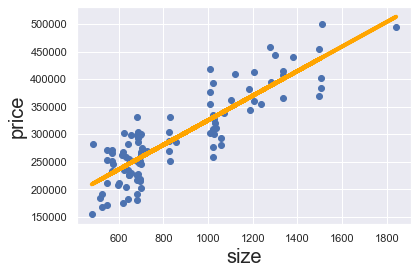

In [39]:
plt.scatter(x, y)
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)

yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c='orange', label='regression line')

plt.show()